In [30]:
# Dependencies
import requests
import json
import quandl #https://docs.quandl.com/docs/python-time-series give a how to guide
from config import q_api_key as api_key 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#use this call to set the api_key
quandl.ApiConfig.api_key = api_key

In [24]:
#pull in zipcode list
zipcode_df=pd.read_csv("zipcode.csv")
#turn zipcode into a list
zipcode=zipcode_df['ZipCode'].tolist()

#create a blank list for median home values and median rent
medianrent=[]
medianhomevalues=[]
#pull median home value for each zip code in Chicago at the yearly level for 2018 only
for x in range(0,len(zipcode)):
    try:
        mr_raw=quandl.get(f"ZILLOW/Z{zipcode[x]}_ZRIAH", collapse="annual", start_date="2018-12-31", end_date="2018-12-31")
        mr_list=mr_raw["Value"].tolist()
        medianrent.append(mr_list[0])
        print(f'Pulled rent data for {zipcode[x]}')
    except:
        mr_missing='NaN'
        medianrent.append(mr_missing)
        print(f'Rent data for {zipcode[x]} not found')
    try:
        mhv_raw=quandl.get(f"ZILLOW/Z{zipcode[x]}_ZHVIAH", collapse="annual", start_date="2018-12-31", end_date="2018-12-31")
        mhv_list=mhv_raw["Value"].tolist()
        medianhomevalues.append(mhv_list[0])
        print(f'Pulled home value data for {zipcode[x]}')
    except:
        mhv_missing='NaN'
        medianhomevalues.append(mhv_missing)
        print(f'Home value data for {zipcode[x]} not found')
print(medianrent)
print(medianhomevalues)

Pulled rent data for 60645
Pulled home value data for 60645
Pulled rent data for 60626
Pulled home value data for 60626
Pulled rent data for 60631
Pulled home value data for 60631
Pulled rent data for 60646
Pulled home value data for 60646
Pulled rent data for 60659
Pulled home value data for 60659
Pulled rent data for 60660
Pulled home value data for 60660
Pulled rent data for 60630
Pulled home value data for 60630
Pulled rent data for 60625
Pulled home value data for 60625
Pulled rent data for 60640
Pulled home value data for 60640
Pulled rent data for 60634
Pulled home value data for 60634
Pulled rent data for 60641
Pulled home value data for 60641
Pulled rent data for 60618
Pulled home value data for 60618
Pulled rent data for 60613
Pulled home value data for 60613
Pulled rent data for 60657
Pulled home value data for 60657
Pulled rent data for 60707
Pulled home value data for 60707
Pulled rent data for 60639
Pulled home value data for 60639
Pulled rent data for 60647
Pulled home v

In [27]:
#create a dataframe of zipcode, median rent, and median home values
housing_df = pd.DataFrame({"ZipCode":zipcode, "Median Rent":medianrent, "Median Home Value":medianhomevalues})
housing_df

,ZipCode,Median Rent,Median Home Value
0,60645,1620.0,215600
1,60626,1495.0,176900
2,60631,2045.0,332700
3,60646,2250.0,385700
4,60659,1860.0,277100
5,60660,1567.0,203700
6,60630,1946.0,298300
7,60625,1841.0,295200
8,60640,1642.0,237200
9,60634,1858.0,267600


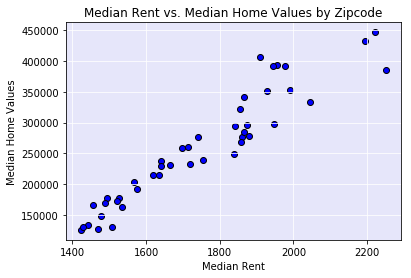

In [33]:
#plot rent vs home value
fig, ax1 = plt.subplots()
ax1.set_facecolor("lavender")
plt.scatter(medianrent,medianhomevalues, edgecolor="black", c="blue", marker='o')
plt.grid(color="white")
plt.title("Median Rent vs. Median Home Values by Zipcode")
plt.ylabel("Median Home Values")
plt.xlabel("Median Rent")
plt.show()